# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
import pylab
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
rcParams['figure.figsize'] = (16, 12)
data = pd.read_excel("geo.xlsx")


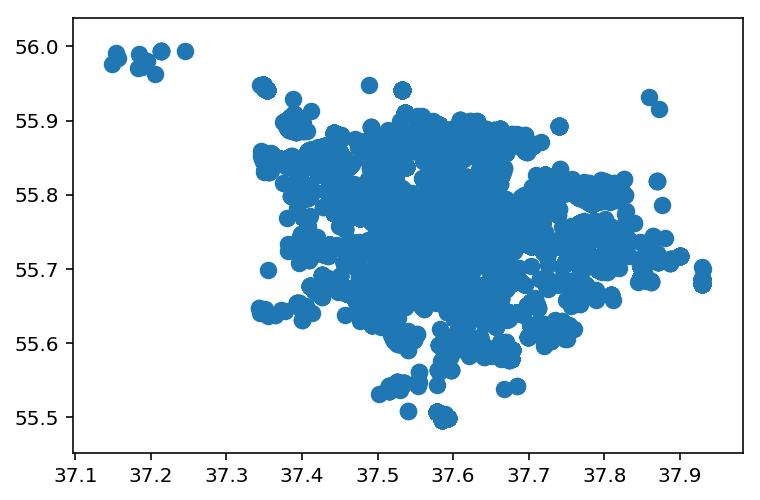

In [2]:
plt.scatter(data['x'], data['y'], cmap='autumn', s=60)

array([[ 0.36791896,  0.15955291],
       [ 0.36791896,  0.15955291],
       [ 0.2931784 , -0.34813064],
       ...,
       [-1.20058354,  1.1836816 ],
       [-0.97563233,  0.38377766],
       [-0.95317246,  1.00936916]])

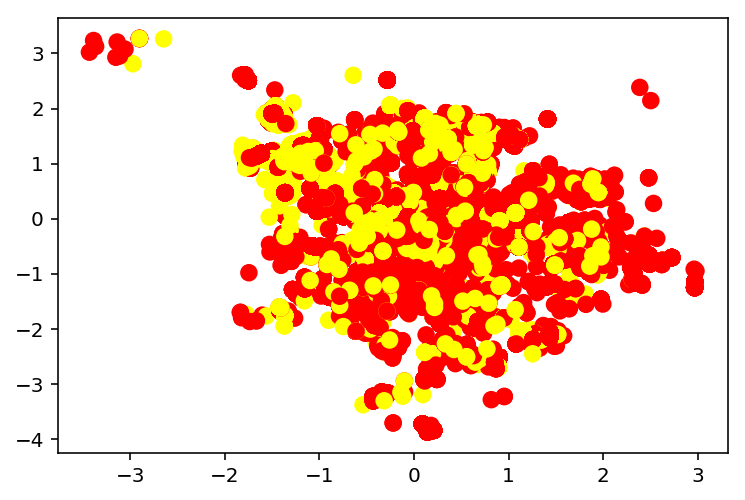

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.array([data['x'].transpose(), data['y']]).transpose())
plt.scatter(X_scaled[:,0] ,X_scaled[:,1],c = data['comment_class'], cmap='autumn', s=60)
X_scaled

In [52]:
k_inertia = []
ks = range(1,20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_scaled,)
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

18

In [ ]:
mod1 = KMeans(n_clusters=k_opt)
mod2 = AgglomerativeClustering()
mod3 = DBSCAN(eps = 0.5, min_samples=50)
mod4 = AffinityPropagation()
ind = np.random.randint(0, X_scaled.shape[0], 10000)
#Насколько я понял, возникает ошибка, связанная с нехваткой памяти, поэтому колличество фичей ограничено
y_pred1 = mod1.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_pred1)

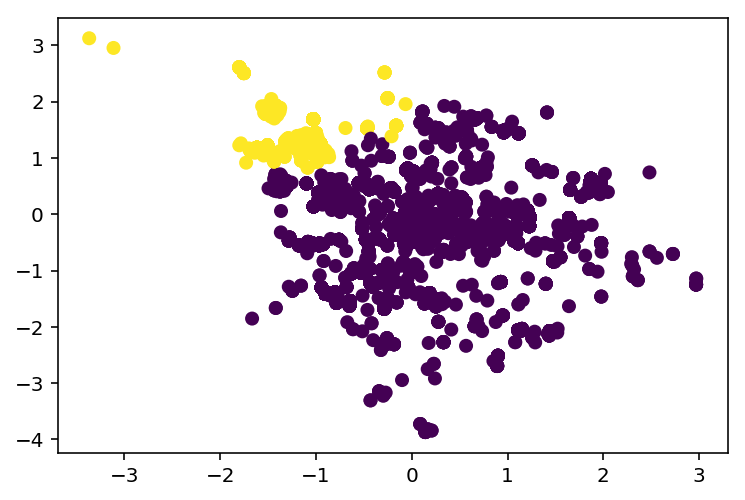

In [54]:
y_pred2 = mod2.fit_predict(X_scaled[ind])
plt.scatter(X_scaled[ind,0], X_scaled[ind,1], c = y_pred2)

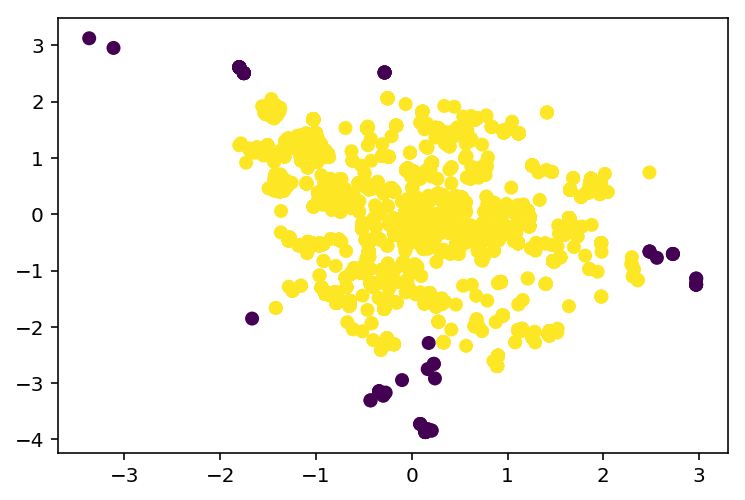

In [55]:
y_pred3 = mod3.fit_predict(X_scaled[ind])
plt.scatter(X_scaled[ind,0], X_scaled[ind,1], c = y_pred3)

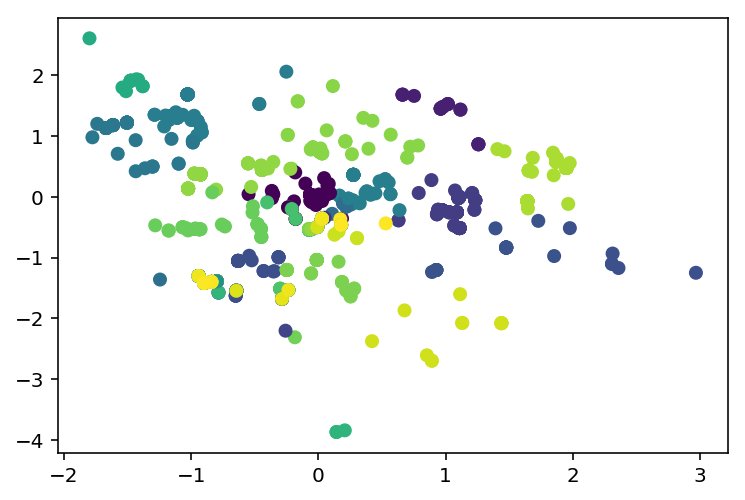

In [56]:
ind = np.random.randint(0, X_scaled.shape[0], 1000)
y_pred4 = mod4.fit_predict(X_scaled[ind])
plt.scatter(X_scaled[ind,0], X_scaled[ind,1], c = y_pred4)

In [59]:
for_data = np.where(data['comment_class']==1)
for_vec = np.array(data)[for_data]

In [60]:
X_for_scaled = scaler.fit_transform(np.array([for_vec[:,0].transpose(), for_vec[:,1]]).transpose())
print(X_for_scaled)
print(X_for_scaled.shape)

[[-0.16701157 -0.66683515]
 [-0.1640515  -0.79116702]
 [-0.3947497  -0.88011374]
 ...
 [-1.19866757  0.85950028]
 [-1.17409523  0.14520085]
 [-1.42485448  1.05523145]]
(13659, 2)


In [61]:
against_data = np.where(data['comment_class']!=1)
against_data = against_vec = np.array(data)[against_data]
X_against_scaled = scaler.fit_transform(np.array([against_vec[:,0].transpose(), against_vec[:,1]]).transpose())

In [62]:
k_inertia = []
ks = range(1,20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_for_scaled,)
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [74]:
mod1 = KMeans(n_clusters=k_opt)
mod2 = AgglomerativeClustering()
mod3 = DBSCAN(eps = 0.5, min_samples=4)
mod4 = AffinityPropagation()
ind = np.random.randint(0, X_for_scaled.shape[0], 10000)
y_pred1 = mod1.fit_predict(X_for_scaled)
y_pred2 = mod2.fit_predict(X_for_scaled[ind])
y_pred3 = mod3.fit_predict(X_for_scaled[ind])

[[-0.30211821 -0.67639914]
 [-0.30211821 -0.67639914]
 [-0.3947497  -0.88011374]
 ...
 [ 1.45448546  0.26133962]
 [-1.41993852  1.18464369]
 [-0.30211821 -0.67639914]]


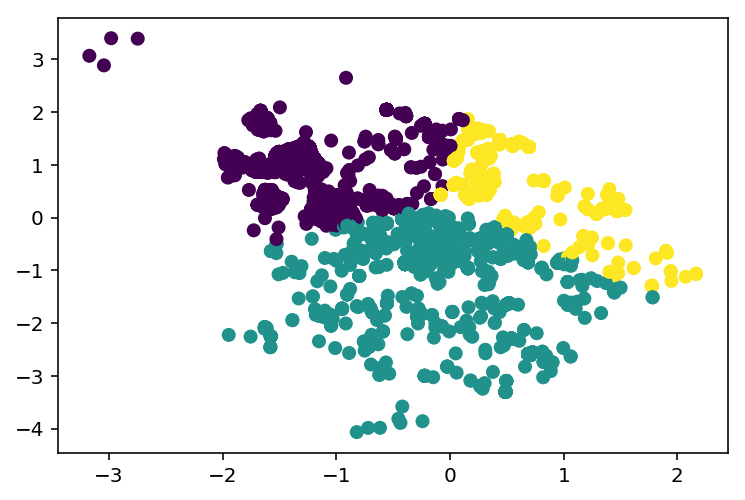

In [64]:
plt.scatter(X_for_scaled[:,0], X_for_scaled[:,1], c = y_pred1)

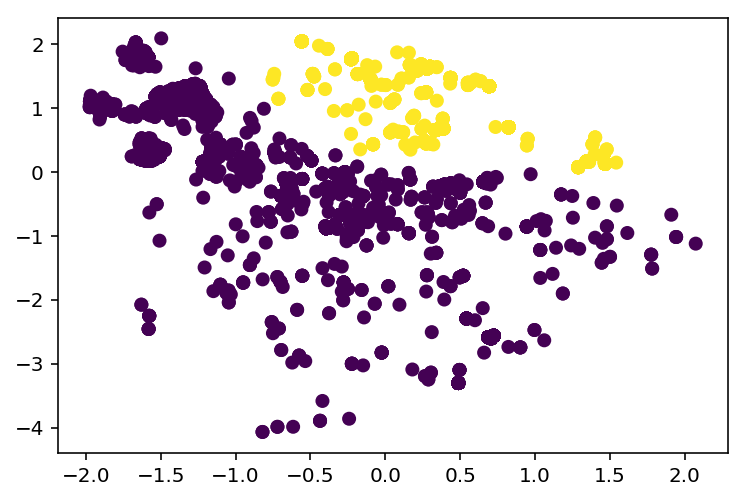

In [65]:
plt.scatter(X_for_scaled[ind,0], X_for_scaled[ind,1], c = y_pred2)

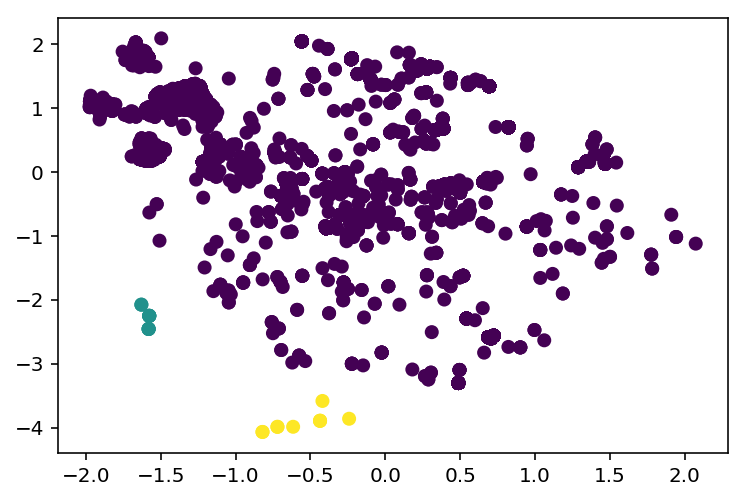

In [66]:
plt.scatter(X_for_scaled[ind,0], X_for_scaled[ind,1], c = y_pred3)

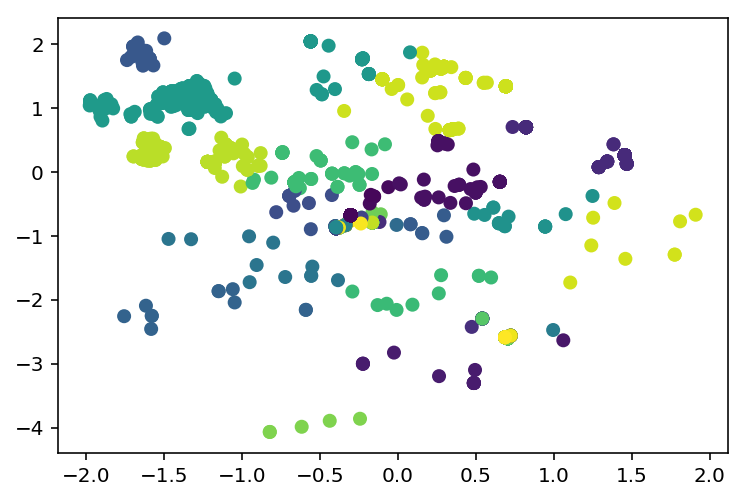

In [67]:
ind = np.random.randint(0, X_for_scaled.shape[0], 2000)
y_pred4 = mod4.fit_predict(X_for_scaled[ind])
plt.scatter(X_for_scaled[ind,0], X_for_scaled[ind,1], c = y_pred4)

In [68]:
k_inertia = []
ks = range(1,11)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_against_scaled,)
    k_inertia.append(clf_kmeans.inertia_)
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [69]:
mod1 = KMeans(n_clusters=k_opt)
mod2 = AgglomerativeClustering()
mod3 = DBSCAN(eps = 0.5, min_samples=4)
mod4 = AffinityPropagation()
ind = np.random.randint(0, X_against_scaled.shape[0], 10000)
y_pred1 = mod1.fit_predict(X_against_scaled)
y_pred2 = mod2.fit_predict(X_against_scaled[ind])
y_pred3 = mod3.fit_predict(X_against_scaled[ind])


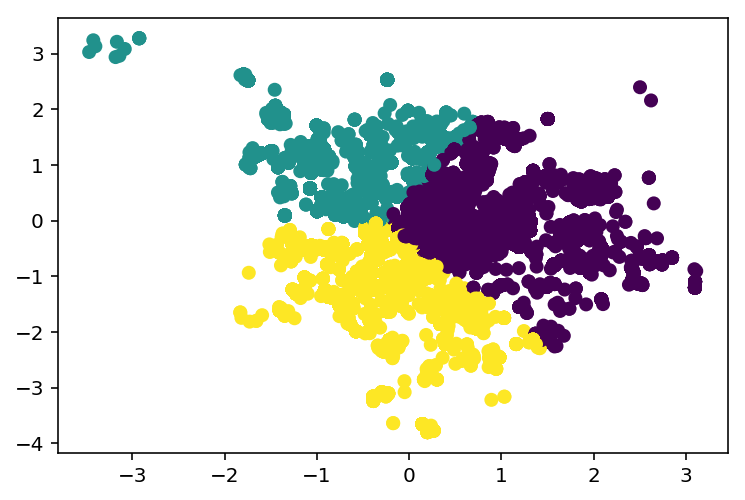

In [70]:
plt.scatter(X_against_scaled[:,0], X_against_scaled[:,1], c = y_pred1)

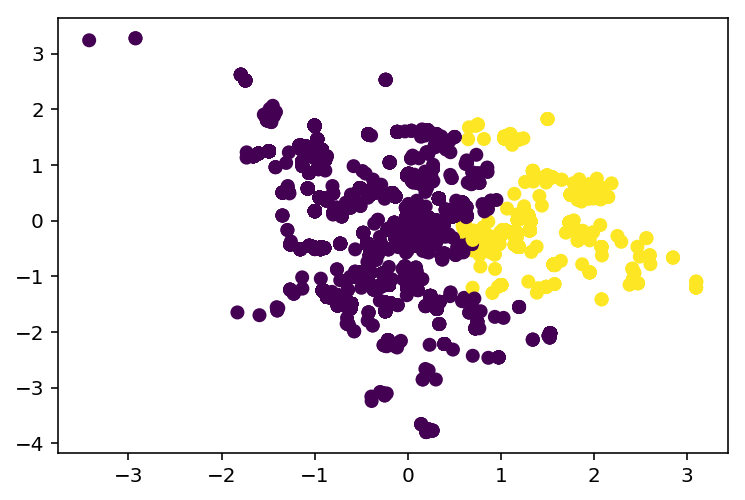

In [71]:
plt.scatter(X_against_scaled[ind,0], X_against_scaled[ind,1], c = y_pred2)

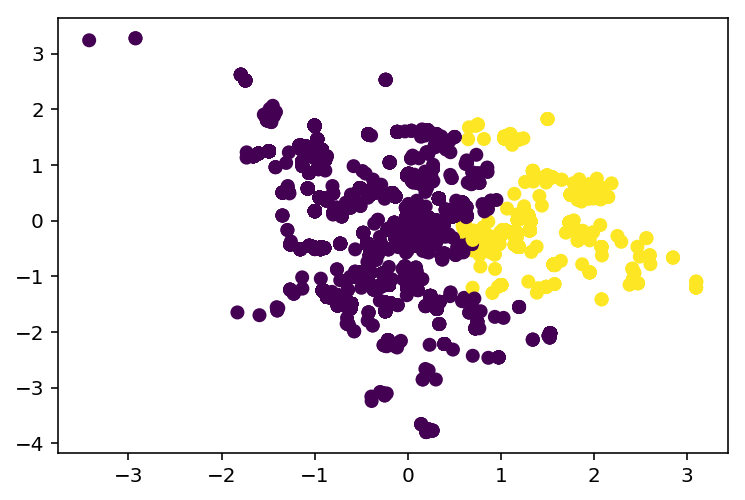

In [72]:
plt.scatter(X_against_scaled[ind,0], X_against_scaled[ind,1], c = y_pred2)

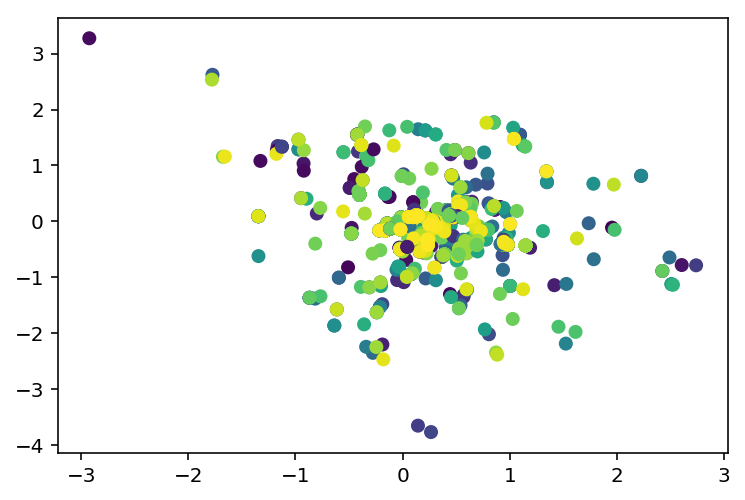

In [73]:
ind = np.random.randint(0, X_for_scaled.shape[0], 2000)
y_pred4 = mod4.fit_predict(X_for_scaled[ind])
plt.scatter(X_against_scaled[ind,0], X_against_scaled[ind,1], c = y_pred4)